## **Hyperparameter tuning**

**i) Import libraries**

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
import joblib

**ii) Load models and test train splits for tuning**

In [13]:
# Import the best model - Random Forest
rf_model = joblib.load('/home/davidkibet/Desktop/Life Expectancy ML/models/rf_model.pkl')
lgb_model = joblib.load('/home/davidkibet/Desktop/Life Expectancy ML/models/LGB_model.pkl')
# load training and test sets
X_train = joblib.load("/home/davidkibet/Desktop/Life Expectancy ML/models/train_test_sets/X_train.pkl")
X_test = joblib.load("/home/davidkibet/Desktop/Life Expectancy ML/models/train_test_sets/X_test.pkl")
y_train = joblib.load("/home/davidkibet/Desktop/Life Expectancy ML/models/train_test_sets/y_train.pkl")
y_test = joblib.load("/home/davidkibet/Desktop/Life Expectancy ML/models/train_test_sets/y_test.pkl")
 

### **a) RandomForestRegressor**

**i) Initial model**

In [14]:
rf = RandomForestRegressor(random_state=42)

**ii) Parameters and RandomizedSearchCV**

In [11]:
param_dist = {
    "n_estimators": [100, 250, 500, 750, 1000],
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring="neg_mean_squared_error",
    verbose=2,
    n_jobs=-1  # Use all CPU cores
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END max_depth=20, max_features=sqrt, min

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 250, 500, 750,
                                                         1000]},
                   scoring='neg_mean_squared_error', verbose=2)

**iii) Get best parameter**

In [97]:
best_rf = random_search.best_estimator_
print("Best Params:", random_search.best_params_)

Best Params: {'n_estimators': 750, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


**iv) Predict**

In [99]:
y_pred_test = best_rf.predict(X_test)
y_pred_train = best_rf.predict(X_train)

**v) Evaluate**

In [100]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

- **Train Metrics**

In [101]:
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Train MSE: {mse_train:.4f}")
print(f"Train MAE: {mae_train:.4f}")
print(f"Train R² Score: {r2_train:.4f}")

Train MSE: 0.7788
Train MAE: 0.5520
Train R² Score: 0.9919


- **Test metrics**

In [102]:
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test:.4f}")
print(f"Test MAE: {mae_test:.4f}")
print(f"Test R² Score: {r2_test:.4f}")

Test MSE: 5.0570
Test MAE: 1.5695
Test R² Score: 0.9295


**vi) Extract feature importance**

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = best_rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": importances}
).sort_values(by="Importance", ascending=False)

# Display the top features
print(feature_importance_df)

                            Feature  Importance
12                         HIV/AIDS    0.206122
17  Income composition of resources    0.181697
1                   Adult Mortality    0.136860
18                        Schooling    0.098439
7                              BMI     0.065403
8                under-five deaths     0.055023
11                      Diphtheria     0.038478
2                     infant deaths    0.034892
16               thinness 5-9 years    0.034425
15             thinness  1-19 years    0.030148
9                             Polio    0.025925
13                              GDP    0.024416
4            percentage expenditure    0.015878
3                           Alcohol    0.012937
20                Status_Developing    0.010981
10                Total expenditure    0.006762
5                       Hepatitis B    0.005837
6                          Measles     0.005071
19                 Status_Developed    0.004405
0                              Year    0

**vii) Plot**

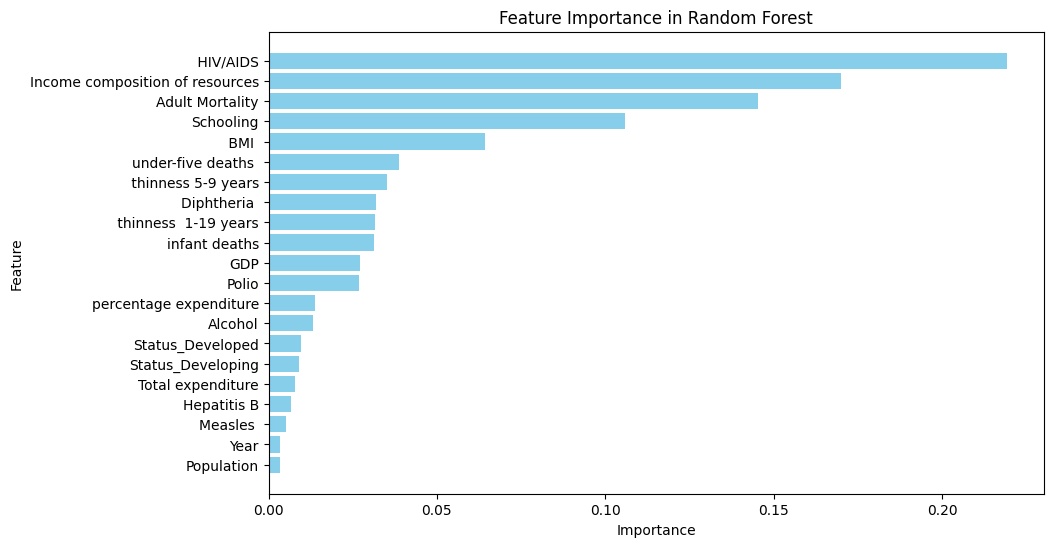

In [46]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()


### **Most Important Features**
1. **Income Composition of Resources (0.192984)**  
   - This is the most influential predictor.  
   - It likely represents a country's overall wealth, human development, and resource allocation.  
   - Higher values may correlate with longer life expectancy.

2. **Adult Mortality (0.187412)**  
   - Mortality rates significantly impact life expectancy.  
   - A high adult mortality rate suggests poor healthcare, shorter lifespans.

3. **HIV/AIDS (0.169765)**  
   - Strong negative impact on life expectancy in regions with high prevalence.  
   - Effective healthcare systems can mitigate this effect.

4. **Schooling (0.101871)**  
   - Education is tied to better health outcomes, economic opportunities, and awareness of diseases.  
   - Countries with higher schooling rates tend to have higher life expectancy.


### **Moderately Important Features**
5. **BMI (0.069922)**  
   - Can indicate nutritional status—both obesity and malnutrition affect longevity.  

6. **Under-Five Deaths (0.049035)**  
   - High child mortality rates reduce overall life expectancy.  
   - Likely linked to healthcare quality, nutrition, and sanitation.

7. **Thinness (5-9 years: 0.031464, 1-19 years: 0.025504)**  
   - Undernourishment in children can lead to long-term health issues.  

8. **Polio & Diphtheria (0.030491 & 0.022157)**  
   - Vaccination rates indicate the effectiveness of healthcare programs.  
   - Poor immunization coverage can increase disease burden and mortality.

### **Less Important Features**
9. **GDP (0.020652)**  
   - Wealthier nations generally have better healthcare, but GDP alone isn’t a perfect indicator.  

10. **Infant Deaths (0.016720)**  
    - Closely related to under-five mortality but slightly less significant in this model.  

11. **Alcohol Consumption (0.013900)**  
    - Excessive alcohol use can reduce life expectancy, but other factors (like healthcare) may buffer the effect.  

12. **Status (Developed: 0.010133, Developing: 0.012378)**  
    - Being a developed country slightly influences life expectancy but not as much as expected.  
    - Other variables (like GDP, schooling) already capture these differences.

13. **Year (0.007369)**  
    - Suggests that over time, there might be improvements in life expectancy, but it's not a major predictor.  

14. **Measles & Hepatitis B (0.004841 & 0.007212)**  
    - These individual diseases have a smaller effect on overall life expectancy compared to broader indicators like healthcare access.

15. **Population (0.004609)**  
    - Population size has almost no impact on life expectancy in this model.  

**b) LightGBM**

In [18]:
# Clean column names
X_train.columns = [col.replace(' ', '_') for col in X_train.columns]
X_test.columns = [col.replace(' ', '_') for col in X_test.columns]

In [21]:
import lightgbm as lgb

# Create dataset for lightgbm
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,          # Reduce learning rate
    'num_leaves': 20,               # Reduce number of leaves
    'max_depth': 5,                 # Limit tree depth
    'min_data_in_leaf': 20,         # Require more samples per leaf
    'lambda_l1': 0.5,               # Add L1 regularization
    'lambda_l2': 0.5,               # Add L2 regularization
    'feature_fraction': 0.7,        # Use fewer features per tree
    'bagging_fraction': 0.7,        # Use less data per tree
    'bagging_freq': 1               # Perform bagging more frequently
}

# Train model
model = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[train_data, val_data],
    callbacks=[lgb.early_stopping(stopping_rounds=20)]
)

Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 1.57419	valid_1's rmse: 2.26245
